**Cette atelier a pour objectif de présenter rapidement les principales fonctionnalités offertes par
le package « scientisttools » pour réaliser une Analyse Factorielle Discriminante ou Analyse
Discriminante Descriptive.**




*  Présentation des données




In [ ]:
import pandas as pd
import numpy as np
from scientisttools.utils import eta2
from scientisttools.discriminant_analysis import CANDISC
from scientisttools.extractfactor import get_eig
from scientisttools.extractfactor import summaryCANDISC

A travers l’exemple des Vins de Bordeaux. On cherche à relier la qualité des
vins de Bordeaux à des caractéristiques météorologiques.
La variable à expliquer y est la qualité du vin et prend 3 modalités : 1 = bon, 2 = moyen et 3= médiocre. Les variables explicatives de la qualité du vin sont les suivantes :


*   X1 (Somme des températures moyennes journalières (°C))
*   X2 (Durée d’insolation (h))
*   X3 (Nombre de jours de grande chaleur)
*   X4 (Hauteur des pluies (mm))







In [ ]:
data = pd.read_excel("/content/sample_data/wine_quality.xls")
data.head()

,Obs.,Annee,Temperature,Soleil,Chaleur,Pluie,Qualite
0,1,1924,3064,1201,10,361,Moyen
1,2,1925,3000,1053,11,338,Mediocre
2,3,1926,3155,1133,19,393,Moyen
3,4,1927,3085,970,4,467,Mediocre
4,5,1928,3245,1258,36,294,Bon


Pour la suite, nous allons supprimer la colonne « Obs » de notre jeu de données.

In [ ]:
# Suppression Obs.
donnee = data.drop(['Obs.'],axis=1)
donnee.head()

,Annee,Temperature,Soleil,Chaleur,Pluie,Qualite
0,1924,3064,1201,10,361,Moyen
1,1925,3000,1053,11,338,Mediocre
2,1926,3155,1133,19,393,Moyen
3,1927,3085,970,4,467,Mediocre
4,1928,3245,1258,36,294,Bon


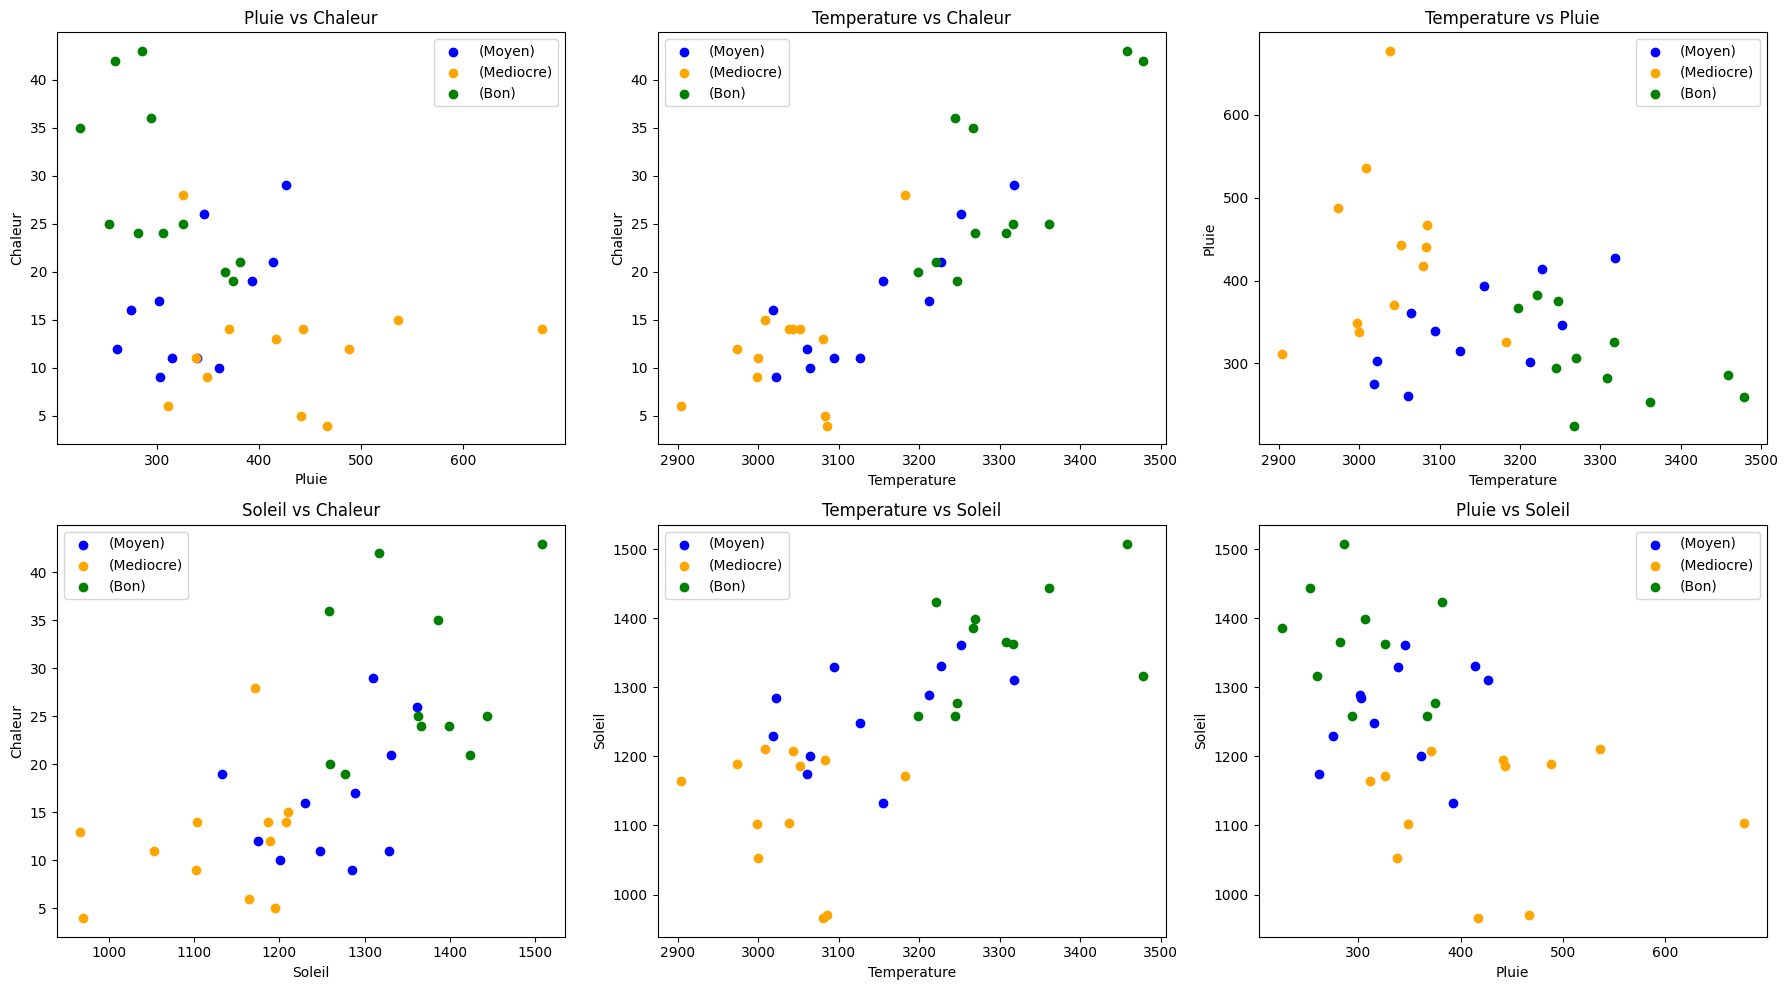

In [ ]:
# Créer un ensemble de sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Liste des paires d'axes à tracer
axes_pairs = [('Pluie', 'Chaleur'), ('Temperature', 'Chaleur'), ('Temperature', 'Pluie'), ('Soleil', 'Chaleur'), ('Temperature', 'Soleil'),('Pluie', 'Soleil')]

# Couleurs pour les différentes catégories de Qualite
colors = {'Moyen': 'blue', 'Mediocre': 'orange', 'Bon': 'green'}

# Parcourir chaque paire d'axes et créer les nuages de points
for (i, j), ax in zip(axes_pairs, axes.flatten()):
    for qualite, color in colors.items():
        subset = donnee[donnee['Qualite'] == qualite]
        ax.scatter(subset[i], subset[j], label=f'({qualite})', color=color)
        ax.set_xlabel(i)
        ax.set_ylabel(j)
        ax.set_title(f'{i} vs {j}')
        ax.legend()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les sous-graphiques
plt.show()



*   On crée une instance de la classe CANDISC, en lui passant ici des étiquettes pour les lignes et
les variables.

*   Le constructeur de la classe CANDISC possède un paramètre n_components qui
indique le nombre d’axes discriminants à garder. Par défaut, la valeur du paramètre n_components est fixée à None.






In [ ]:
# Instanciation
my_cda = CANDISC(n_components=2,
                  target=["Qualite"],
                  row_labels=donnee.index,
                  features_labels=["Temperature","Soleil","Chaleur","Pluie"],
                  parallelize=False)

# Apprentissage
my_cda.fit(donnee)

CANDISC(features_labels=['Temperature', 'Soleil', 'Chaleur', 'Pluie'],
        n_components=2, row_labels=RangeIndex(start=0, stop=34, step=1),
        target=['Qualite'])

— **n_components** : le nombre d’axes discriminants à garder dans les résultats

— **target** : le label de la variable cible

— **row_labels** : les noms des lignes

— **features_labels** : les noms des variables explicatives


---




*   Le pouvoir discriminant des facteurs est traduit par les valeurs propres qui leurs sont associées.





In [ ]:
# Valeurs propres
print("valeurs propres")
print(get_eig(my_cda))

valeurs propres
     eigenvalue  difference  proportion  cumulative
LD1    3.278860    3.140286   95.945086   95.945086
LD2    0.138574         NaN    4.054914  100.000000


Le premier axe discriminant contient 96% de l’information totale disponible.

LD1 est le principal discriminant linéaire et explique presque la totalité de la variabilité, tandis que LD2 contribue à la part restante.




*  On peut obtenir un résumé des principaux résultats en utilisant la fonction summaryCANDISC.




In [ ]:
summaryCANDISC(my_cda)

                     Canonical Discriminant Analysis - Results                     


Summary Information
       Total Sample Size  Variables  Classes  DF Total  DF Within Classes  \
value                 34          4        3        33                 31   

       DF Between Classes  
value                   2  

Class Level information
          n(k)      p(k)
Qualite                 
Mediocre    12  0.352941
Bon         11  0.323529
Moyen       11  0.323529

Importance of components
                            LD1      LD2
Variance                  3.279    0.139
Difference                3.140      NaN
% of var.                95.945    4.055
Cumulative of % of var.  95.945  100.000

Group means:
          Temperature    Soleil  Chaleur    Pluie
Qualite                                          
Bon          3306.364  1363.636   28.545  305.000
Mediocre     3037.333  1126.417   12.083  430.333
Moyen        3140.909  1262.909   16.455  339.636

Coefficients of canonical discriminan



*   Il ne faut pas oublier les constantes (intercept) des fonctions discriminantes.




In [ ]:
# et les constantes pour chaque classe
print(my_cda.intercept_)

[32.87628192 -2.16527944]




*   Nous pouvons dès lors adopter une présentation plus sympathique des fonctions discriminantes.
Pour ce faire, nous utilisons la fonction get_candisc_coef en fixant le paramètre « choice =
"absolute" ».




In [ ]:
# Affichage des coefficients
from scientisttools.extractfactor import get_candisc_coef
coef = get_candisc_coef(my_cda,choice="absolute")
coef

,LD1,LD2
Temperature,-0.008566,0.000046
Soleil,-0.006774,0.005329
Chaleur,0.027054,-0.127636
Pluie,0.005866,-0.006175
Intercept,32.876282,-2.165279


**Représentations factorielles**



*   **Coordonnées des individus**



In [ ]:
# Coordonnées des individus
from scientisttools.extractfactor import get_candisc_row
row_coord = get_candisc_row(my_cda)["coord"]
print(row_coord.head(6))

        LD1       LD2
0  0.882552  0.871537
1  2.325456  0.094220
2  0.994856 -0.832957
3  2.726862 -0.247244
4 -0.743596 -1.721167
5 -2.230889 -0.484319


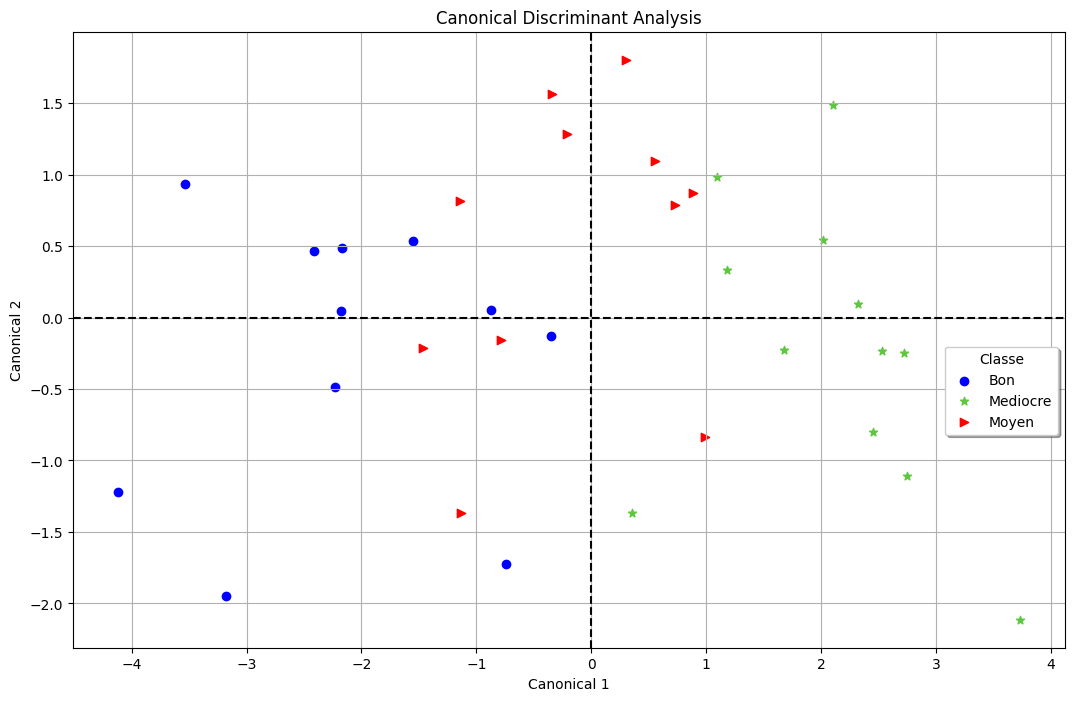

In [ ]:
# Carte des individus
from scientisttools.pyplot import plotCANDISC
import matplotlib.pyplot as plt
fig, axe = plt.subplots(figsize=(16,8))
plotCANDISC(my_cda,color=["blue",'#5DC83F','red'],marker=['o',"*",'>'],ax=axe)
plt.show()



La séparation entre les classes "Bon" et "Moyenne" est moins distincte par rapport à la séparation entre elles et la classe "Médiocre". Certains triangles rouges (Moyenne) sont proches des cercles bleus (Bon), ce qui indique un certain chevauchement ou une similarité dans les caractéristiques définies par les variables canoniques.





*   **Coordonnées des centres de classes**




*   L’introduction des barycentre spermet de mieux situer la qualité relative des facteurs dans la
discrimination des classes.






In [ ]:
# Coordonnées des centres de classes
zk = my_cda.gcenter_
print(zk)

               LD1       LD2
Qualite                     
Bon      -2.121963 -0.271812
Mediocre  2.079247 -0.221184
Moyen    -0.146307  0.513104


 **Evaluation globale du modèle**


*   Evaluation statistique des facteurs
*   Distance entre centres de classes



-Dans le plan factoriel, les distances sont camptabilisées à l’aide d’une simple distance euclidienne.


In [ ]:
# Distances entre centres de classes
print(my_cda.gdisto_)

                Bon   Mediocre     Moyen
Bon        0.000000  17.652729  4.519311
Mediocre  17.652729   0.000000  5.492267
Moyen      4.519311   5.492267  0.000000


**Pouvoir discriminant des facteurs**

-Le pouvoir discriminant des facteurs est traduit par les valeurs propres qui leurs sont associées.

In [ ]:
print(get_eig(my_cda))

     eigenvalue  difference  proportion  cumulative
LD1    3.278860    3.140286   95.945086   95.945086
LD2    0.138574         NaN    4.054914  100.000000


***Test MANOVA***



*   Scientisttools forunit un test de sgnificativité globale du modèle.
*   Nous nous intéressons en particulier à la ligne relative à « Wilks’ Lambda ».






In [ ]:
# Significativité globale du modèle
print(my_cda.manova_)


                 Multivariate linear model
                                                            
------------------------------------------------------------
        Qualite         Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.2053 8.0000 56.0000  8.4505 0.0000
         Pillai's trace 0.8880 8.0000 58.0000  5.7896 0.0000
 Hotelling-Lawley trace 3.4174 8.0000 37.7500 11.7280 0.0000
    Roy's greatest root 3.2789 4.0000 29.0000 23.7717 0.0000



 **Performance globale**

-Nous affichons les valeurs des statistiques suivantes : Lambda de Wilks, Transformation de
Bartlett et de RAO.

In [ ]:
# Performance globale
print(my_cda.global_performance_)

               Stat      Value       p-value
0     Wilks' Lambda   0.205263           NaN
1  Bartlett -- C(8)  46.712169  1.739815e-07
2    Rao -- F(8,56)   8.450507  1.890358e-07


Wilks' lambda :
Une valeur proche de zéro indique une forte discrimination entre les groupes.
La valeur de 0.2053 suggère que le modèle est statistiquement significatif (p-value de 0.0000). Cela indique une différence significative entre les groupes dans l'espace discriminant.

**Matrices de covariance**


*   Elles sont directement fournies par l’objet « scientisttools »



In [ ]:
# Covariance intra - classe
print(my_cda.wcov_)

             Temperature       Soleil     Chaleur        Pluie
Temperature  6991.827094  1714.255793  420.615865   392.273619
Soleil       1714.255793  5946.834447  154.271168  -144.059715
Chaleur       420.615865   154.271168   48.952094   -31.750446
Pluie         392.273619  -144.059715  -31.750446  5249.976827


In [ ]:
# Covariance totale
print(my_cda.tcov_)

              Temperature        Soleil      Chaleur        Pluie
Temperature  19346.750865  12360.302768  1187.420415 -5130.448097
Soleil       12360.302768  15561.807093   795.792388 -5317.760381
Chaleur       1187.420415    795.792388    97.380623  -356.451557
Pluie        -5130.448097  -5317.760381  -356.451557  8108.540657


In [ ]:
# Matrice de covaiance inter - classe
print(my_cda.bcov_)

              Temperature        Soleil     Chaleur        Pluie
Temperature  12354.923771  10646.046975  766.804551 -5522.721715
Soleil       10646.046975   9614.972646  641.521220 -5173.700666
Chaleur        766.804551    641.521220   48.428528  -324.701111
Pluie        -5522.721715  -5173.700666 -324.701111  2858.563830



**Interprétation des facteurs**


*   Elles sont directement fournies par l’objet « scientisttools »



In [ ]:
# Correlation totale
print(my_cda.tcorr_)

                  LD1       LD2
Temperature -0.900589 -0.374779
Soleil      -0.896744  0.116190
Chaleur     -0.770513 -0.590030
Pluie        0.662815 -0.361294


Dans le cas de LD1, les variables "Temperature" et "Soleil" ont des corrélations négatives élevées, indiquant qu'une diminution de ces variables est associée à une augmentation de LD1.

La variable "Pluie" a une corrélation positive, suggérant une relation différente avec LD1.

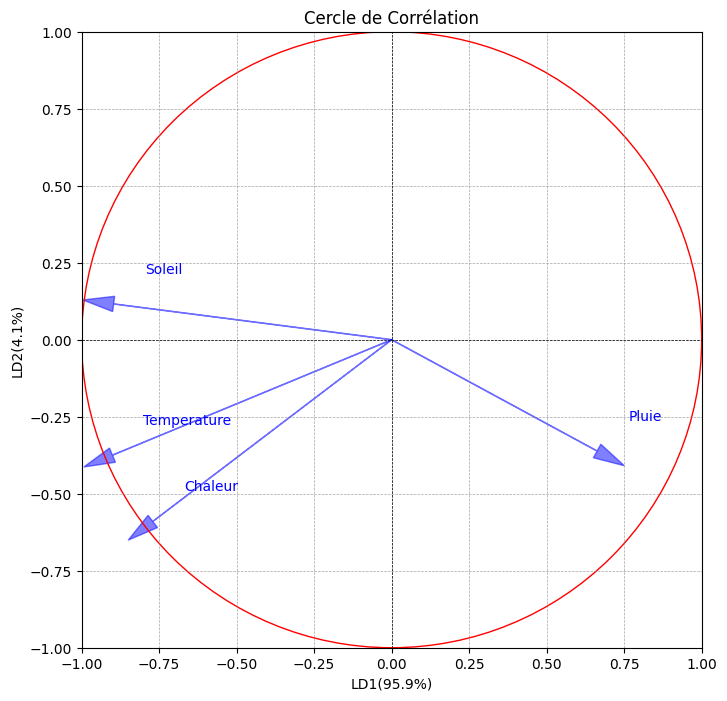

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Matrice de corrélation
correlation_matrix = np.array([[-0.900589, -0.374779],
                               [-0.896744, 0.116190],
                               [-0.770513, -0.590030],
                               [0.662815, -0.361294]])

# Noms des variables
variables = ["Temperature", "Soleil", "Chaleur", "Pluie"]

# Créer le cercle de corrélation
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# Ajouter les flèches pour chaque variable
for i in range(len(variables)):
    ax.arrow(0, 0, correlation_matrix[i, 0], correlation_matrix[i, 1], color='b', alpha=0.5,
             head_width=0.05, head_length=0.1)
    ax.text(correlation_matrix[i, 0] + 0.1, correlation_matrix[i, 1] + 0.1, variables[i], color='b')

# Ajouter les cercles
circle = plt.Circle((0, 0), 1, edgecolor='r', facecolor='none')
ax.add_artist(circle)

# Ajouter des lignes pour les axes
ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax.axvline(0, color='black', linewidth=0.5, linestyle='--')

# Ajouter une grille
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Titre et labels
plt.title('Cercle de Corrélation')
plt.xlabel('LD1(95.9%)')
plt.ylabel('LD2(4.1%)')

# Afficher le cercle de corrélation
plt.show()


In [ ]:
# Correlation intra - classe
print(my_cda.wcorr_)

                  LD1       LD2
Temperature -0.724221 -0.584256
Soleil      -0.701280  0.176148
Chaleur     -0.525372 -0.779910
Pluie        0.398218 -0.420797


 Dans la classe spécifique, la variable "Temperature" a une forte corrélation négative avec LD1 et LD2, indiquant que, dans cette classe, une diminution de la température est associée à une augmentation des valeurs de ces discriminants.

In [ ]:
# Corrélation inter - classe
print(my_cda.bcorr_)

                  LD1       LD2
Temperature -0.986651 -0.211244
Soleil      -0.998654  0.002625
Chaleur     -0.957391 -0.335599
Pluie        0.976576 -0.166812


**Prediction des classes**


*   Considérons l’année 1958. Les données (hypothétiques) de cette année sont :



In [ ]:
## Inidvidu supplémentaire
XTest = pd.DataFrame({"Temperature" : 3000,
"Soleil" : 1100,
"Chaleur" : 20,
"Pluie" : 300},index=[1958])
XTest


,Temperature,Soleil,Chaleur,Pluie
1958,3000,1100,20,300




  **Coordonnées factorielles**



In [ ]:
# Coordonées factorielles
row_sup_coord = my_cda.transform(XTest)
print(row_sup_coord)

           LD1       LD2
1958  2.027679 -0.569395


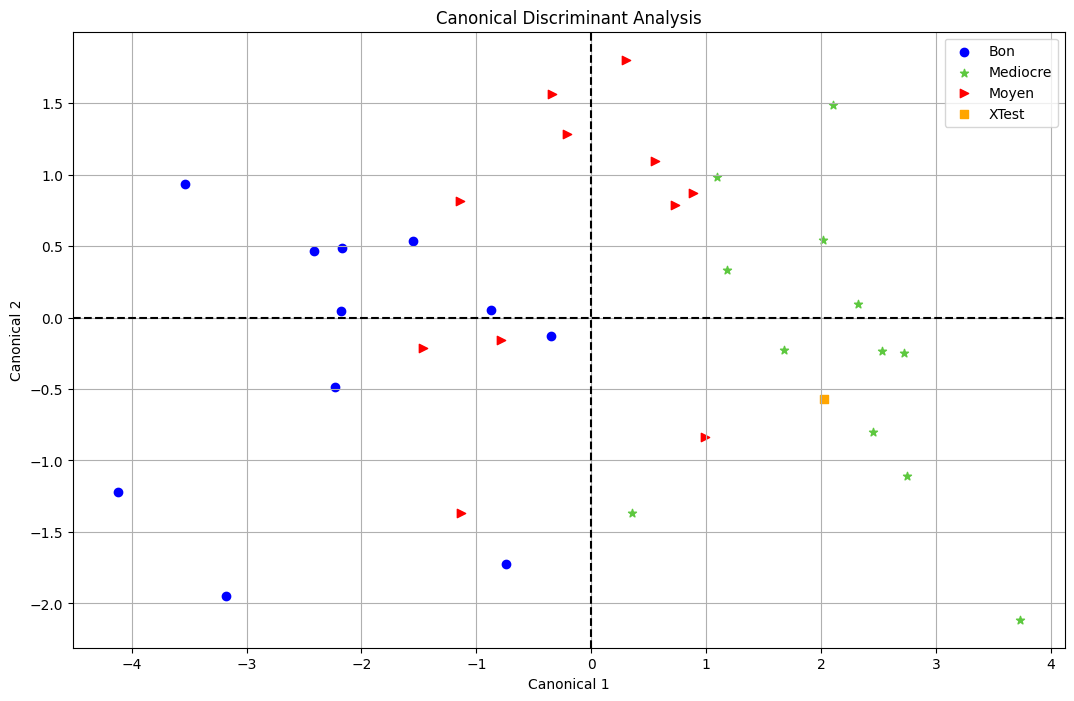

In [ ]:
# Votre code pour afficher le graphe
fig, axe = plt.subplots(figsize=(16, 8))

# Supposons que la fonction plotCANDISC prend en charge l'affichage des coordonnées factorielles
# et prend en paramètre color pour spécifier la couleur des points
plotCANDISC(my_cda, color=["blue", '#5DC83F', 'red'], marker=['o', "*", '>'], ax=axe)

# Afficher le point XTest avec une couleur différente
axe.scatter(row_sup_coord["LD1"], row_sup_coord["LD2"], c='orange', marker='s', label='XTest')

plt.legend()
plt.show()

*   La fonction predict() permet de produire les prédictions à partir de la matrice des explicatives
en test.

In [ ]:
# Prédiction simple
pred = my_cda.predict(XTest)
print(pred)

       predict
1958  Mediocre


**Fonctions de classement explicites**


*   La classe CANDISC de scientisttools retourne les fonctions de décision issues de l’analyse factorielle discriminante. Pour celà, il faut spécifier l’argument « choice == "score".



In [ ]:
# Fonctions de décision - AFD
score_coef = get_candisc_coef(my_cda,choice = "score")
print(score_coef)

                   Bon   Mediocre     Moyen
Temperature   0.018164  -0.017821  0.001277
Soleil        0.012925  -0.015263  0.003726
Chaleur      -0.022716   0.084484 -0.069449
Pluie        -0.010768   0.013562 -0.004026
Intercept   -72.590473  65.609287 -7.191833


**Prédiction des classes sur l’échantillon d’apprentissage**

In [ ]:
import numpy as np
# Prédiction sur XTrain
X = donnee[donnee.columns[1:-1]]

In [ ]:
y_pred = my_cda.predict(X)
# Distribution des classes prédictes
print(np.unique(y_pred,return_counts=True))

(array(['Bon', 'Mediocre', 'Moyen'], dtype=object), array([11, 11, 12]))




*   11 observations ont été prédite « Bon », 11 « Medicocre » et 12 « Moyen ».





*   La matrice de confusion est issue de la confrontation entre ces prédictions et les classes observées.
Nous faisons appel au module « metrics » de la librairie « scikit-learn ».



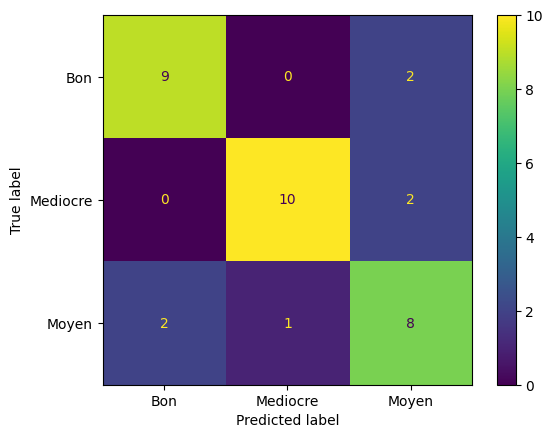

In [ ]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(donnee.Qualite,y_pred,labels=my_cda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=my_cda.classes_)
disp.plot();
plt.show()


La diagonale principale de la matrice représente les prédictions correctes pour chaque classe (9 pour "Bon", 10 pour "Médiocre" et 8 pour "Moyen"). Les cellules en dehors de la diagonale montrent les classifications incorrectes.